# Assignment: Linear Classification
<font color = 'red'>Complete the TODO sections below...</font><br>
<b> Name: Hyun Chung<br>
<b> Email: hchung11@uncc.edu

# Loading Data

In [154]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [155]:
# Download dataset from: https://www.kaggle.com/mig555/mushroom-classification
dataset = pd.read_csv('mushrooms.csv')

<font color = 'red'> TODO: Describe the dataset in your own words. Illustrate using pie charts, scatter plots, correlation matrices etc. and xplain the various relationships between the attributes. Describe the classification problem in brief. </font>

The data cerry two types of mushroom. (class) the rest of them is the descriptions for the mushroom look.
The classification is only good for identifying the object. We may see that we have a lot of label data for just mushrooms. Linear classification use only a line this will make a lot of error so usually impossible to get perfect accuracy 

In [156]:
#Thus we have 22 features(1st one is label) and 8124 instances.
print(dataset.shape)
dataset.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [157]:
dataset.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#

# Pre-processing

<font color = 'red'> TODO: Check for null values. If yes remove them </font>

In [158]:
# Let's check if there are any Null values in the datset. 
# YOUR CODE...
dataset.isnull().sum()

#out put come out there is no null

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [159]:
# This is a binary classification problem. We can see that by executing the below command
dataset['class'].unique()

array(['p', 'e'], dtype=object)

In [160]:
    dataset['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

We can see that the dataset has values in strings.We need to convert all the unique values to integers. Thus we perform label encoding on the data. <font color ='red'>TODO: Use sklearn to perform label encoding on the dataset. You may use the following link for reference: <br>https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html </font>

In [161]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset = dataset.apply(le.fit_transform)
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [162]:
#Your dataset might look similar to mine after you are done...
#YOUR CODE...


dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [163]:
# There are two classes Poisonous and edible (1: p, 0: e). There are 4208 p's and 3916 e's.
print(dataset.groupby('class').size())

class
0    4208
1    3916
dtype: int64


<font color = 'red'>TODO: Convert our dataframe (dataset) to matrices X and T </font>

In [164]:
#put all the class in to the "T"
T = np.array(dataset["class"])
#drop class
dataset = dataset.drop(['class'], axis = 1)


## Correlation matrices

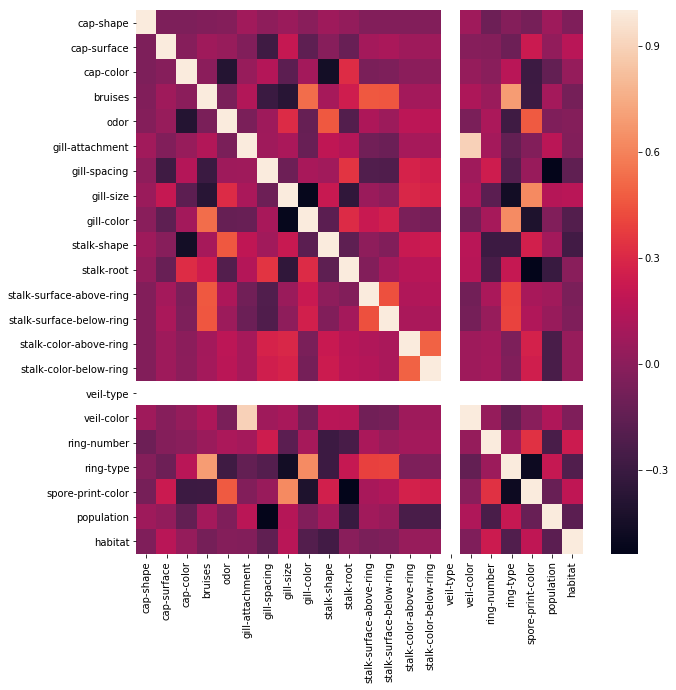

In [165]:
import seaborn as sns

plt.figure(figsize =(10, 10))
corr = dataset.corr()
sns.heatmap(corr, xticklabels=corr.columns.values ,yticklabels=corr.columns.values)


In [166]:
T.shape

(8124,)

<font color = 'red'>TODO: Normalize/Standardize the X matrix ONLY (Scale the data to be between -1 and 1). You may use Sklearn for this purpose. Refer to this link: <br> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html </font>

In [167]:
#import libery
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit(dataset))

C:\Users\gustl\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)


In [168]:
#Normalize dataset
dataset = scaler.transform(dataset)

C:\Users\gustl\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  


In [169]:
#insert one in the first column
dataset = np.insert(dataset,0, 1, axis= 1)

In [170]:
X = np.array(dataset)
print (X)

[[ 1.          1.02971224  0.14012794 ... -0.67019486 -0.5143892
   2.03002809]
 [ 1.          1.02971224  0.14012794 ... -0.2504706  -1.31310821
  -0.29572966]
 [ 1.         -2.08704716  0.14012794 ... -0.2504706  -1.31310821
   0.86714922]
 ...
 [ 1.         -0.8403434   0.14012794 ... -1.50964337 -2.11182722
   0.28570978]
 [ 1.         -0.21699152  0.95327039 ...  1.42842641  0.28432981
   0.28570978]
 [ 1.          1.02971224  0.14012794 ...  0.16925365 -2.11182722
   0.28570978]]


In [171]:
X.shape

(8124, 23)

<font color = 'red'> TODO: Further add 'ones' as bias to X </font>

In [172]:
#YOUR CODE...
#Your X matrix might look similar to mine...
X

array([[ 1.        ,  1.02971224,  0.14012794, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.        ,  1.02971224,  0.14012794, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [ 1.        , -2.08704716,  0.14012794, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [ 1.        , -0.8403434 ,  0.14012794, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [ 1.        , -0.21699152,  0.95327039, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.        ,  1.02971224,  0.14012794, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [173]:
X.shape

(8124, 23)

In [174]:
#You do not have to normalize the T matrix.
T

array([1, 0, 0, ..., 0, 1, 0])

# Perceptron Model

<font color ='red'> TODO: Complete the Perceptron model. Refer to class notes for theory...</font>

In [175]:
maxiter = 1000
alpha = 0.1
w = np.zeros(X.shape[1])

In [176]:
print ("X :",X.shape, "-------T:",T.shape, "-------W :",w.shape)
print (w[1:])

X : (8124, 23) -------T: (8124,) -------W : (23,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [177]:
def predict(X, w):
        y_hat = np.where(np.dot(X,w) >= 0.0, 1, 0)
        return y_hat

In [178]:
print(X.shape[0])

8124


In [195]:
import time
from tqdm import tqdm
#initialize y_hat 
y_hat = np.zeros(X.shape[0])
#initialize N so that number of row from X
N = X.shape[0]
#initialize number iteration loop 1000 time
maxiter = 1000
#initialize alpha another word for the learning rate
alpha = 0.1
#initialize weight 'w' has number of column in X
w = np.zeros(X.shape[1])

#fuction for the Perceptron There are four input
def train(w,T,X,alpha):
    for k in log_progress(range(100), every=1):
        #instead using sign() meathod i used predict()
        y_hat = predict(X,w)
        #this for loop N(8124) : becuase we need to go over every row
        for j in range (N):
            #If predict not equal to T than do it
            if y_hat[j] != T[j]:
                #weight 'w' change every time the not equal.
                w += alpha  * (T[j]-y_hat[j]) *X[j]
    #return final w value
    return w

In [196]:
 w=train(w,T,X, alpha)


In [197]:

y = predict(X, w)

In [198]:
print (np.sum(y)/2, np.sum(T))
e= 0
f= 0
for i in range(len(T)):
   
    if y[i]== T[i]:
        f = f+1
    else:
        e=e+1
print("flase" ,e)
print ("ture",f)
print (f/len(T))

1950.0 3916
flase 542
ture 7582
0.9332840965041851


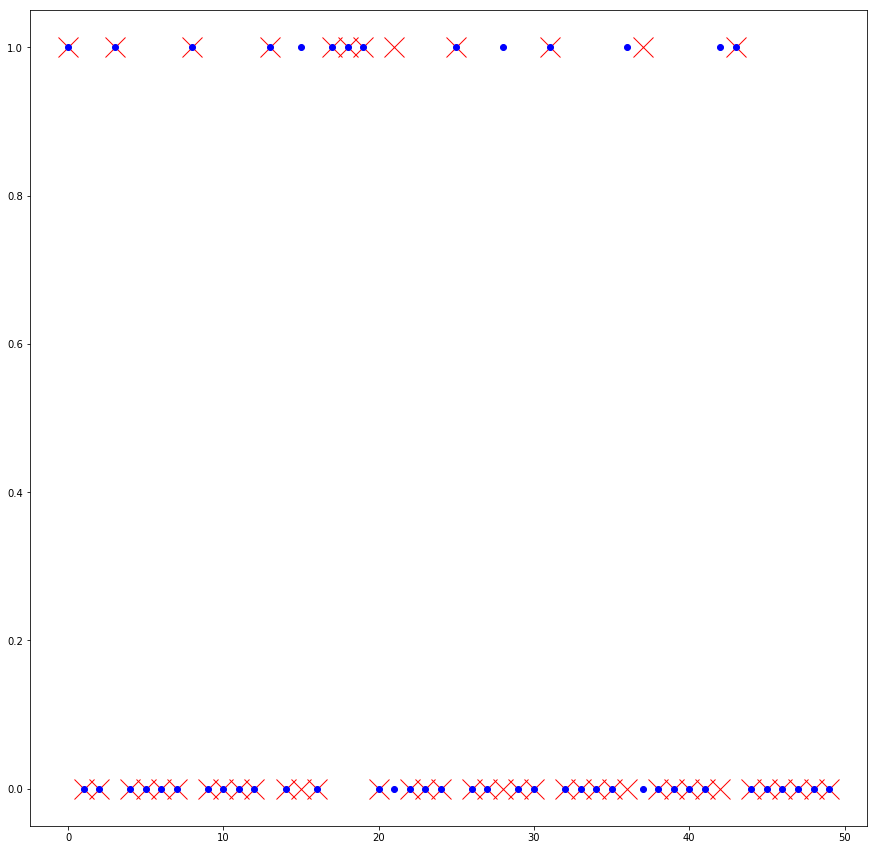

In [199]:
# I plotted the first 50 entries of both y(predicited value corresponding to T) and T. Here's how it looked like...
plt.figure(figsize=(15, 15))
plt.plot(T[:50], 'xr', markersize = 20)
plt.plot(y[:50], 'ob')
plt.show()

# Pocket Algorithm

<font color = 'red'>TODO: Complete the Pocket Model </font><br>

The idea is straightforward: this algorithm keeps the best result seen so far in its pocket (that is why it is called Pocket Learning Algorithm). The best result means the number of misclassification is minimum. If the new weights produce a smaller number of misclassification than the weights in the pocket, then replace the weights in the pocket to the new weights; if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, rather than the last solution. <br>

Here's a pseudocode...<br>

1. Initialize the pocket weight vector, W_{pocket}, to 0 or small random numbers and use this weight vector as the initialized weight vector, W_0 of Perceptron Learning Algorithm.
2. For each training iteration, perform the following sub-steps:
	1. Run the training step of Perceptron Learning Algorithm to obtain the updated weight vector, W_t, where t indicates the current iteration.
	2. Evaluate W_t by comparing the number of misclassification on the entire sample set with the number of misclassification performed by W_{pocket}.
	3. If W_t is better than W_{pocket}, replace W_{pocket} to W_t.
3. Return W_{pocket} when the training iteration terminates. <br>


<font color = 'red'> HINT while implementation: Pocket algorithm might take a lot of time to train (Be patient!). Hence it is better if you print the iterations along while training. 


In [102]:

"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-102-161a1d539891>, line 2)

In [181]:
""" 
    Pocket Algorithm 

"""
import time
from tqdm import tqdm
from copy import deepcopy as copy 
w_pocket = copy(w)

# return 1 if w is better -1 if wp is better
def compare(X, T, w, wp):
    y = predict(X,w)
    yp = predict(X, wp)

    return 1 if np.sum(y == T) >= np.sum(yp == T) else 0

#initialize y_hat 
y_hat = np.zeros(X.shape[0])
#initialize N so that number of row from X
N = X.shape[0]
#initialize number iteration loop 1000 time
maxiter = 1000
#initialize alpha another word for the learning rate
alpha = 0.1
#initialize weight 'w' has number of column in X
w = np.zeros(X.shape[1])

#fuction for the Perceptron There are four input
def w_pocket_train(w,T,X,alpha):
    for k in log_progress(range(100), every=1):
        #instead using sign() meathod i used predict()
        y_hat = predict(X,w)
        #this for loop N(8124) : becuase we need to go over every row
        for j in range (N):
            #If predict not equal to T than do it
            if y_hat[j] != T[j]:
                #weight 'w' change every time the not equal.
                w += alpha  * (T[j]-y_hat[j]) *X[j]
                
            if compare(X,T,w,w_pocket) > 0:
                w_pocket[:] = w[:]
    #return final w value
    return w_pocket

In [182]:
y_pocket=w_pocket_train(w,T,X,alpha)

In [183]:
y_pocket = predict(X, w_pocket)

In [184]:
y_pocket

array([1, 0, 0, ..., 0, 1, 0])

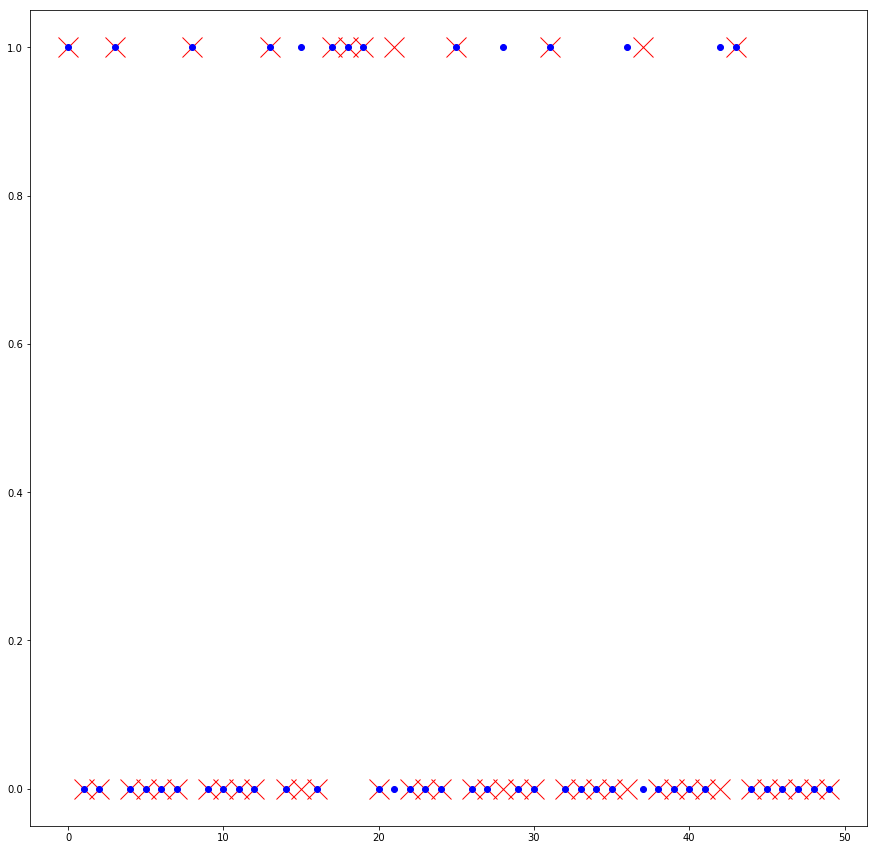

In [185]:
# I plotted the first 50 entries of both y(predicited value corresponding to T) and T. Here's how it looked like...
plt.figure(figsize=(15, 15))
plt.plot(T[:50], 'xr', markersize = 20)
plt.plot(y[:50], 'ob')

<font color = 'red'> Note that our algorithm does not seem to have good accuracy. But it is fine as practically it is very difficult to find an exactly linearly seperable dataset.</font>

In [189]:
# Print out your confusion matrix using this code...
def confusion_matrix(Y, T):
    """
        Y    nd.array
             predicted labels
        T    nd.array
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

In [190]:
confusion_matrix(y, T)

,0,1
0,3945,279
1,263,3637


In [191]:
confusion_matrix(y_pocket, T)

,0,1
0,3956,34
1,252,3882


In [192]:
#libery from the metric and usein the F-score 
from sklearn.metrics import f1_score
#just averge percenage of correct
f1_score(y,T, average= 'weighted')

0.9332890851758625

In [193]:
#F-score for the y_pocket
#just averge percenage of correct
f1_score(y_pocket,T, average= 'weighted')

0.9647870615712852

<font color = 'red'>Answer the following questions:</font><br>
1. How many True Positives did you get for Perceptron and Pocket?
<p>11 For perceptron = 3637, Pocket = 3882</p>
2. How many True Negatives did you get for Perceptron and Pocket?
<p>00 For perceptron = 3945, Pocket = 3956</p>
3. How many False Positives did you get for Perceptron and Pocket?
<p>01 For perceptron = 279, Pocket = 34</p>
4. How many False Negatives did you get for Perceptron and Pocket?
<p>10 For perceptron = 263, Pocket = 252</p>
5. What is F-score of both Perceptron and Pocket?
<p>Perceptron is 0.9332890851758625</p>
<p>Pocket is 0.9647870615712852</p>